In [1]:
import platform
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import os
data_path = "../Data/"

%matplotlib inline

In [2]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


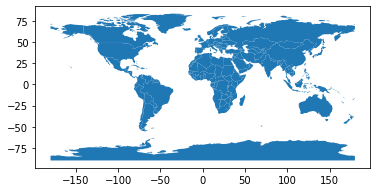

In [3]:
world.plot()

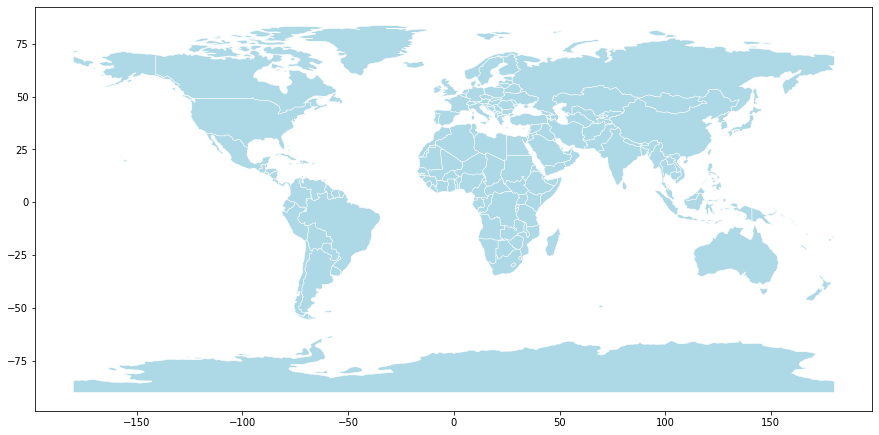

In [4]:
world.plot(color='lightblue', linewidth=0.5, edgecolor='white', figsize=(15,10));

In [5]:
cities = gpd.read_file(os.path.join(data_path, "ne_10m_populated_places.shp"))
cities.head()

,FEATURECLA,NAME,ADM0NAME,ADM1NAME,LATITUDE,LONGITUDE,POP,ELEVATION,TIMEZONE,GEONAMESNO,CITYALT,geometry
0,Admin-1 capital,Colonia del Sacramento,Uruguay,Colonia,-34.479999,-57.840002,21714,0.0,America/Montevideo,Geonames ascii name + lat.d + long.d matching.,None,POINT (-57.84000 -34.48000)
1,Admin-1 capital,Trinidad,Uruguay,Flores,-33.543999,-56.900997,21093,0.0,America/Montevideo,Geonames ascii name + lat.d + long.d matching.,None,POINT (-56.90100 -33.54400)
2,Admin-1 capital,Fray Bentos,Uruguay,RÃ­o Negro,-33.138999,-58.303997,23279,0.0,America/Montevideo,Geonames ascii name + lat.d + long.d matching.,None,POINT (-58.30400 -33.13900)
3,Admin-1 capital,Canelones,Uruguay,Canelones,-34.538004,-56.284001,19698,0.0,America/Montevideo,Geonames ascii name + lat.d + long.d matching.,None,POINT (-56.28400 -34.53800)
4,Admin-1 capital,Florida,Uruguay,Florida,-34.099002,-56.214998,32234,0.0,America/Montevideo,Geonames ascii name + lat.d + long.d matching.,None,POINT (-56.21500 -34.09900)


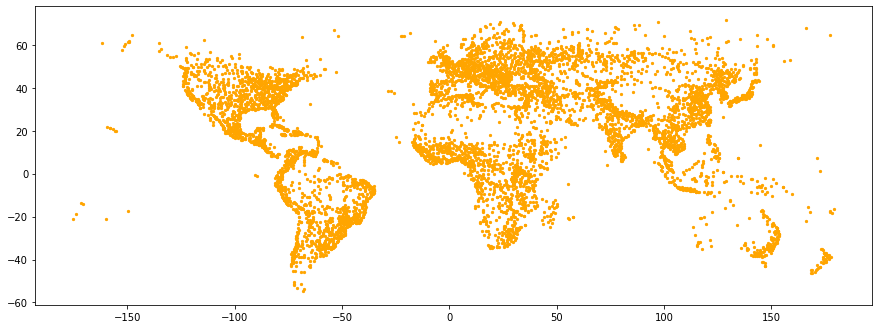

In [6]:
cities.plot(figsize=(15,10), color='orange', markersize=5);

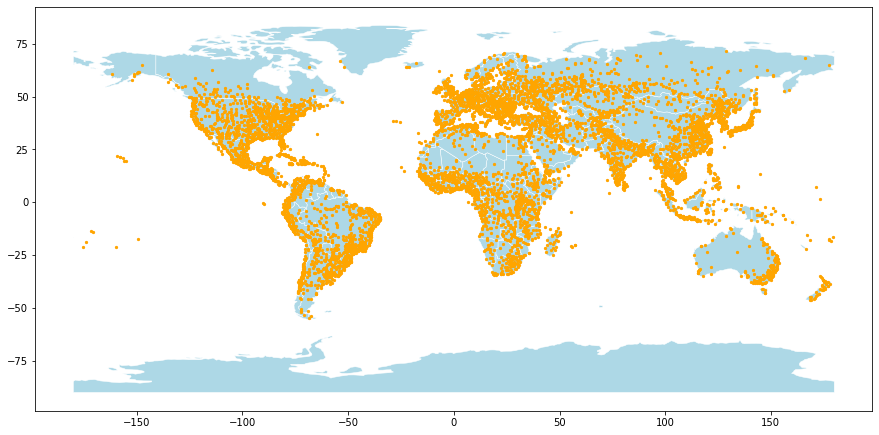

In [7]:
base_world = world.plot(color='lightblue', linewidth=0.5, edgecolor='white', figsize=(15,10))
cities.plot(ax=base_world, color='orange', markersize=5);

<h2> Look for Eclipse<h2>

In [8]:
eclipses = gpd.read_file(os.path.join(data_path, "Eclipses.shp"))

In [9]:
eclipses.head()

,OID_,Name,Shape_Leng,Shape_Area,Year,geometry
0,0,Umbra,303.633219,130.461081,2017,"POLYGON Z ((-171.577 39.738 0.000, -171.740 39..."
1,0,Umbra,223.557661,165.607105,2019,"POLYGON Z ((-160.398 -37.648 0.000, -160.654 -..."
2,0,Umbra,310.979509,99.233931,2020,"POLYGON Z ((-132.816 -7.774 0.000, -132.743 -7..."
3,0,Umbra,274.491359,757.922577,2021,"POLYGON Z ((-51.183 -53.087 0.000, -48.952 -51..."
4,0,Umbra Limit (East),267.246357,31.230251,2023,"POLYGON Z ((180.000 3.217 0.000, 180.000 3.123..."


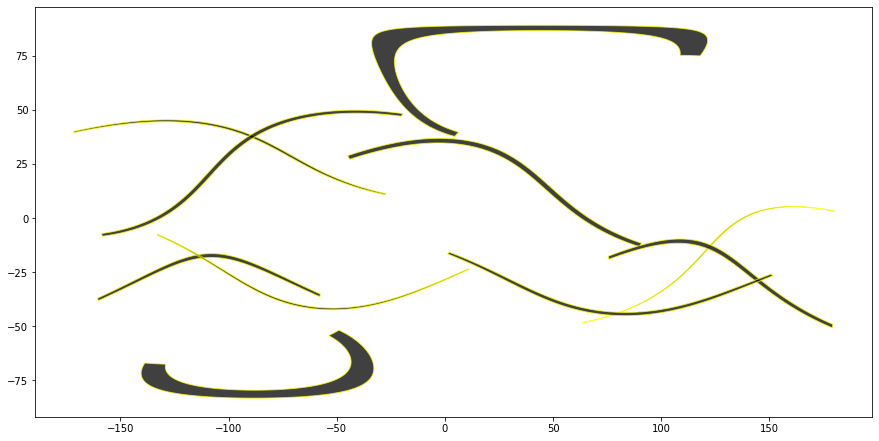

In [10]:
eclipses.plot(figsize=(15,10), color='black', edgecolor='yellow', alpha=0.75);

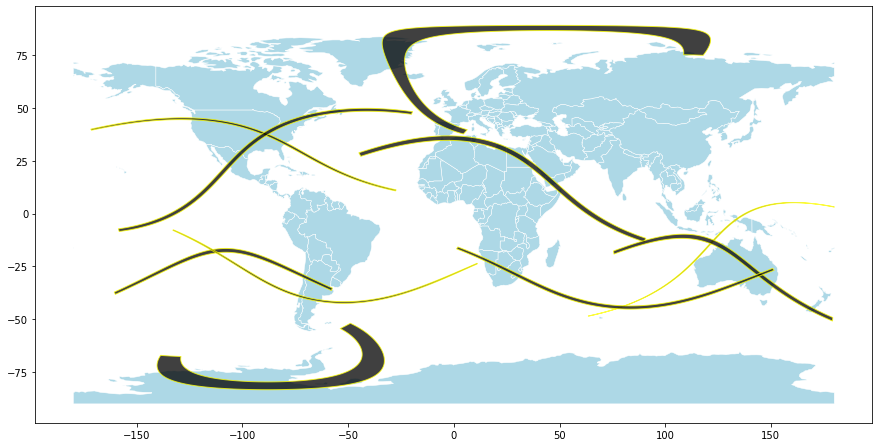

In [11]:
base_world = world.plot(color='lightblue', linewidth=0.5, edgecolor='white', figsize=(15,10))
eclipses.plot(ax=base_world, color='black', edgecolor='yellow', alpha=0.75);

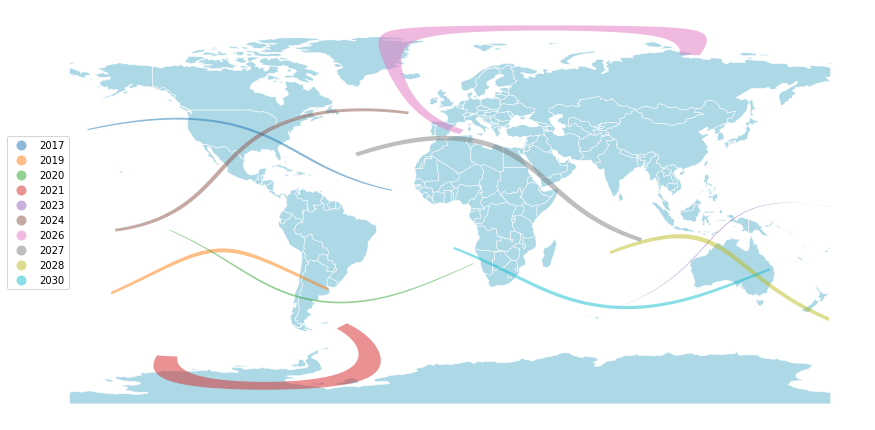

In [12]:
base_world = world.plot(color='lightblue', linewidth=0.5, edgecolor='white', figsize=(15,10))
eclipses.plot(ax=base_world, cmap='tab10', alpha=0.5, categorical = True, column = "Year", legend=True)
base_world.set_axis_off()
base_world.get_legend().set_bbox_to_anchor((.05,.7))

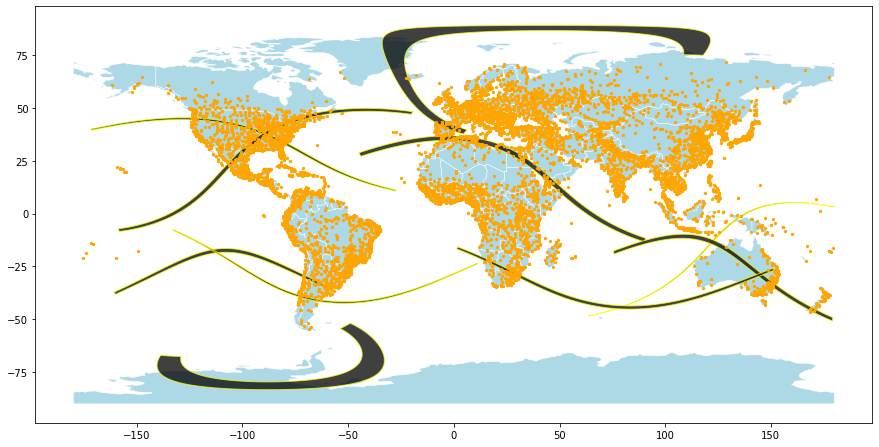

In [13]:
base_world = world.plot(color='lightblue', linewidth=0.5, edgecolor='white', figsize=(15,10))
eclipses.plot(ax=base_world, color='black', edgecolor='yellow', alpha=0.75)
cities.plot(ax=base_world, color='orange', markersize=5);

In [14]:
allecities = gpd.sjoin(cities, eclipses, how='inner', op='intersects')

In [15]:
allecities.head()

,FEATURECLA,NAME,ADM0NAME,ADM1NAME,LATITUDE,LONGITUDE,POP,ELEVATION,TIMEZONE,GEONAMESNO,CITYALT,geometry,index_right,OID_,Name,Shape_Leng,Shape_Area,Year
12,Admin-1 capital,Kasserine,Tunisia,Kasssrine,35.216703,8.716699,76243,0.0,None,"No GeoNames match due to small population, not...",None,POINT (8.71670 35.21670),7,0,Umbra,303.52546,325.721626,2027
13,Admin-1 capital,Sdid Bouzid,Tunisia,Sidi Bou Zid,35.016696,9.500004,42098,0.0,Africa/Tunis,GeoNames spatial join with similar names only.,None,POINT (9.50000 35.01670),7,0,Umbra,303.52546,325.721626,2027
15,Admin-1 capital,Mahdia,Tunisia,Mahdia,35.483913,11.040877,45977,0.0,None,None,None,POINT (11.04088 35.48391),7,0,Umbra,303.52546,325.721626,2027
427,Admin-1 capital,Bordj Bou ArrÃ©ridj,Algeria,Bordj Bou Arreridj,36.059004,4.629996,140000,0.0,None,None,None,POINT (4.63000 36.05900),7,0,Umbra,303.52546,325.721626,2027
428,Admin-1 capital,M'sila,Algeria,M'Sila,35.700003,4.545001,150000,0.0,None,"No GeoNames match due to small population, not...",None,POINT (4.54500 35.70000),7,0,Umbra,303.52546,325.721626,2027


In [16]:
allecities = pd.DataFrame(allecities[['POP', 'Year']])

In [17]:
temp_group = allecities.groupby(['Year'])[["POP"]].sum()
temp_group

,POP
Year,
2017,6259810
2019,1064173
2020,352237
2023,103610
2024,27774481
2026,5410608
2027,22032732
2028,5175798
2030,4784330


In [18]:
eclipses_pop = pd.merge(eclipses, temp_group, left_on='Year', right_index=True)

In [19]:
eclipses_pop.head()

,OID_,Name,Shape_Leng,Shape_Area,Year,geometry,POP
0,0,Umbra,303.633219,130.461081,2017,"POLYGON Z ((-171.577 39.738 0.000, -171.740 39...",6259810
1,0,Umbra,223.557661,165.607105,2019,"POLYGON Z ((-160.398 -37.648 0.000, -160.654 -...",1064173
2,0,Umbra,310.979509,99.233931,2020,"POLYGON Z ((-132.816 -7.774 0.000, -132.743 -7...",352237
4,0,Umbra Limit (East),267.246357,31.230251,2023,"POLYGON Z ((180.000 3.217 0.000, 180.000 3.123...",103610
5,0,Umbra,315.537741,253.727828,2024,"POLYGON Z ((-158.510 -7.820 0.000, -158.720 -7...",27774481


In [20]:
eclipses_pop.sort_values('POP', ascending = False)

,OID_,Name,Shape_Leng,Shape_Area,Year,geometry,POP
5,0,Umbra,315.537741,253.727828,2024,"POLYGON Z ((-158.510 -7.820 0.000, -158.720 -7...",27774481
7,0,Umbra,303.525460,325.721626,2027,"POLYGON Z ((-44.461 27.959 0.000, -44.928 28.7...",22032732
0,0,Umbra,303.633219,130.461081,2017,"POLYGON Z ((-171.577 39.738 0.000, -171.740 39...",6259810
6,0,Umbra,431.598625,970.638404,2026,"POLYGON Z ((113.474 75.084 0.000, 108.710 75.1...",5410608
8,0,Umbra,952.489452,325.668986,2028,"POLYGON Z ((75.665 -18.383 0.000, 75.524 -17.6...",5175798
9,0,Umbra,318.125550,221.452683,2030,"POLYGON Z ((1.613 -16.213 0.000, 1.911 -15.761...",4784330
1,0,Umbra,223.557661,165.607105,2019,"POLYGON Z ((-160.398 -37.648 0.000, -160.654 -...",1064173
2,0,Umbra,310.979509,99.233931,2020,"POLYGON Z ((-132.816 -7.774 0.000, -132.743 -7...",352237
4,0,Umbra Limit (East),267.246357,31.230251,2023,"POLYGON Z ((180.000 3.217 0.000, 180.000 3.123...",103610


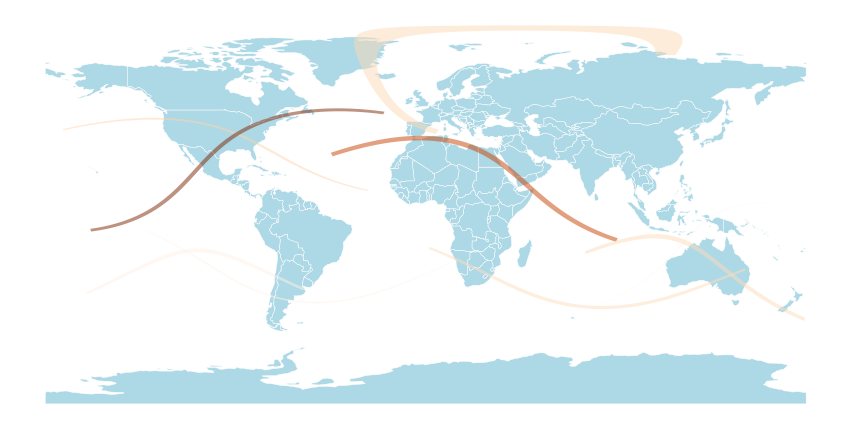

In [21]:
base_world = world.plot(color='lightblue', linewidth=0.5, edgecolor='white', figsize=(15,10))
eclipses_pop.plot(ax=base_world, cmap='Oranges', alpha=0.5, column = "POP")
base_world.set_axis_off()

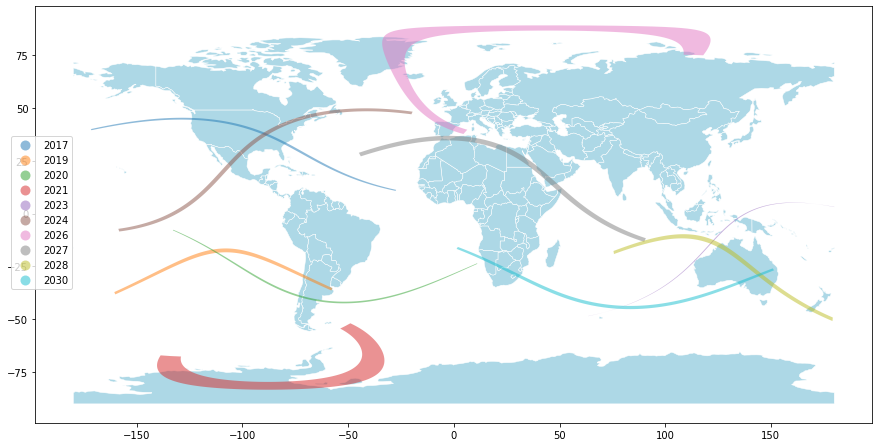

In [22]:
base_world = world.plot(color='lightblue', linewidth=0.5, edgecolor='white', figsize=(15,10))
eclipses.plot(ax=base_world, cmap='tab10', alpha=0.5, categorical = True, column = "Year", legend=True)
base_world.get_legend().set_bbox_to_anchor((.05,.7));

In [23]:
myeclipse = eclipses[(eclipses['Year'] == 2024)]

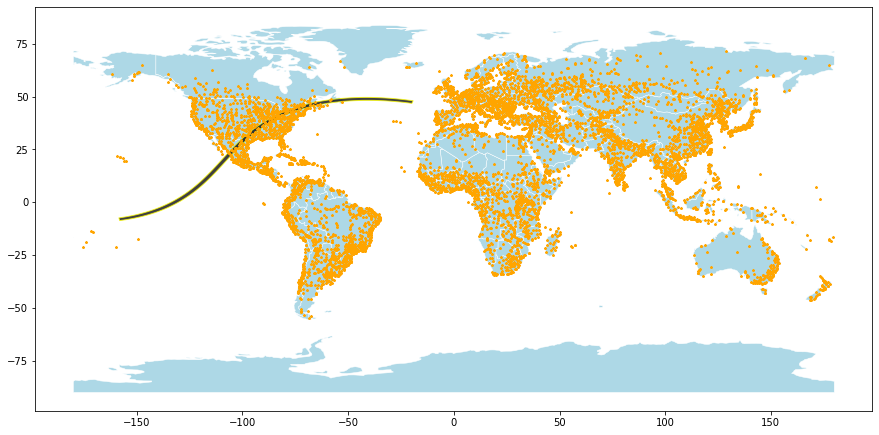

In [24]:
base_world = world.plot(color='lightblue', linewidth=0.5, edgecolor='white', figsize=(15,10))
myeclipse.plot(ax=base_world, color='black', edgecolor='yellow', alpha=0.75)
cities.plot(marker='*', color='orange', markersize=5, ax=base_world);

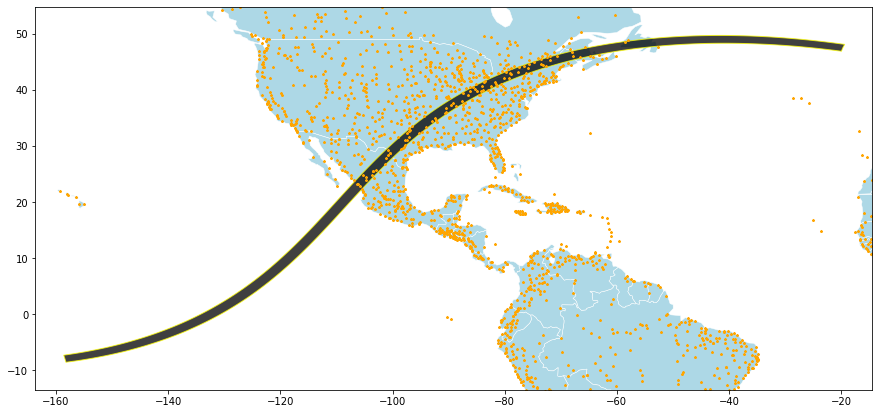

In [25]:
base_world = world.plot(color='lightblue', linewidth=0.5, edgecolor='white', figsize=(15,10))
myeclipse.plot(ax=base_world, color='black', edgecolor='yellow', alpha=0.75)
cities.plot(marker='*', color='orange', markersize=5, ax=base_world)
bounds = myeclipse.geometry.bounds
plt.xlim([bounds.minx.min()-5, bounds.maxx.max()+5])
plt.ylim([bounds.miny.min()-5, bounds.maxy.max()+5]);

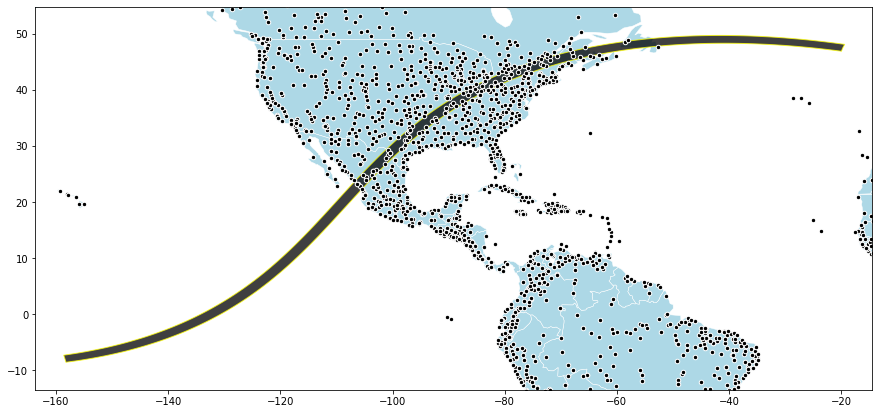

In [26]:
base_world = world.plot(color='lightblue', linewidth=0.5, edgecolor='white', figsize=(15,10))
myeclipse.plot(ax=base_world, color='black', edgecolor='yellow', alpha=0.75)
cities.plot(ax=base_world, color='black', markersize=20, edgecolor='white')
bounds = myeclipse.geometry.bounds
plt.xlim([bounds.minx.min()-5, bounds.maxx.max()+5])
plt.ylim([bounds.miny.min()-5, bounds.maxy.max()+5]);

In [27]:
ecities = gpd.sjoin(cities, myeclipse, how='inner', op='intersects')

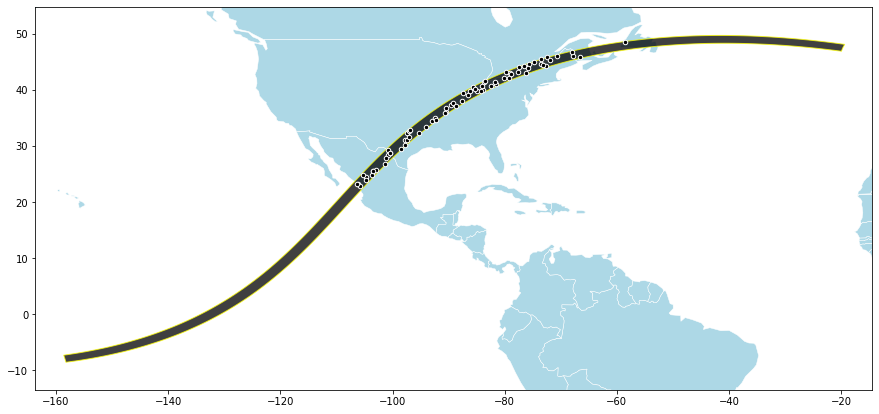

In [28]:
base_world = world.plot(color='lightblue', linewidth=0.5, edgecolor='white', figsize=(15,10))
myeclipse.plot(ax=base_world, color='black', edgecolor='yellow', alpha=0.75)
ecities.plot(ax=base_world, color='black', markersize=20, edgecolor='white')
bounds = myeclipse.geometry.bounds
plt.xlim([bounds.minx.min()-5, bounds.maxx.max()+5])
plt.ylim([bounds.miny.min()-5, bounds.maxy.max()+5]);

(-13.450309999999945, 54.82445000000007)

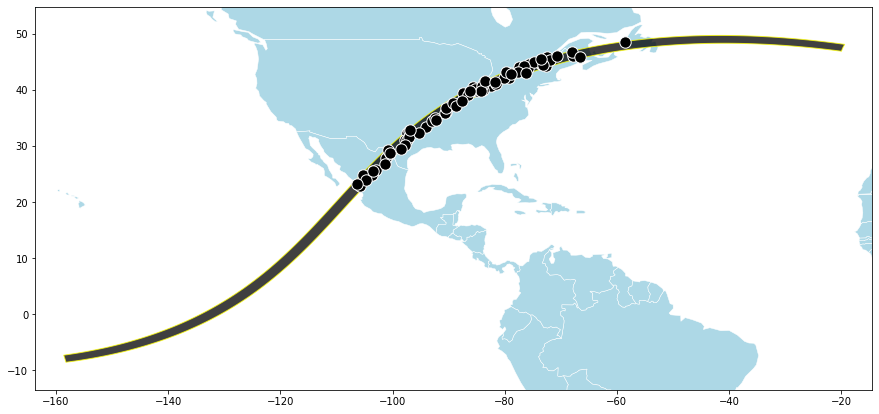

In [29]:
base_world = world.plot(color='lightblue', linewidth=0.5, edgecolor='white', figsize=(15,10))
myeclipse.plot(ax=base_world, color='black', edgecolor='yellow', alpha=0.75)
ecities.plot(ax=base_world, color='black', edgecolor='white', markersize=130)
bounds = myeclipse.geometry.bounds
plt.xlim([bounds.minx.min()-5, bounds.maxx.max()+5])
plt.ylim([bounds.miny.min()-5, bounds.maxy.max()+5])

In [30]:
print('There are {} cities in the eclipse path!'.format(len(ecities)))
print("Here are the largest 5:")
print(ecities.sort_values('POP', ascending = False)['NAME'].head(5))

There are 73 cities in the eclipse path!
Here are the largest 5:
6269    Dallas/Ft. Worth
6368           MontrÃ©al
5967           Cleveland
5962         San Antonio
5446        Indianapolis
Name: NAME, dtype: object


In [31]:
top_five = ecities.sort_values('POP', ascending = False)[:5]

(-13.450309999999945, 54.82445000000007)

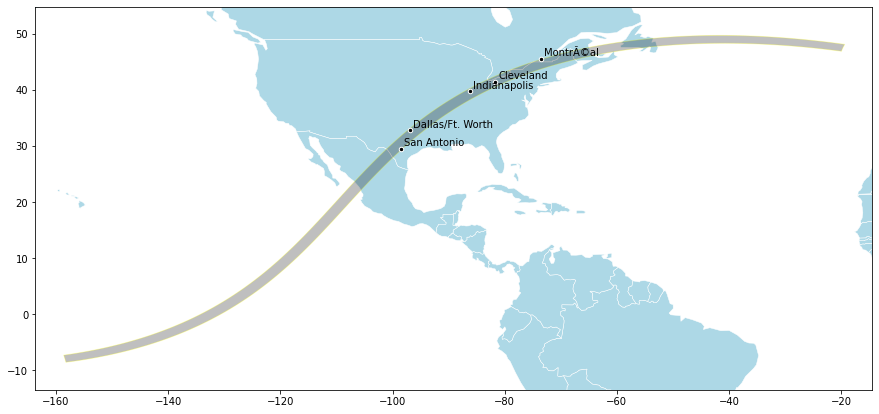

In [32]:
base_world = world.plot(color='lightblue', linewidth=0.5, edgecolor='white', figsize=(15,10))
myeclipse.plot(ax=base_world, color='black', edgecolor='yellow', alpha=0.25)
top_five.plot(ax=base_world, color='black', edgecolor='white', markersize=20)
for x, y, label in zip(top_five.geometry.x, top_five.geometry.y, top_five.NAME):
    base_world.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points")
bounds = myeclipse.geometry.bounds
plt.xlim([bounds.minx.min()-5, bounds.maxx.max()+5])
plt.ylim([bounds.miny.min()-5, bounds.maxy.max()+5])

In [33]:
import folium

In [34]:
Petaluma = [38.23, -122.64]

osm_map = folium.Map(location=Petaluma, zoom_start=10)
osm_map

In [35]:
map_stamen_toner = folium.Map(
    location=Petaluma,
    tiles='stamentoner',
    zoom_start=10
)
map_stamen_toner

In [36]:
map_stamen_water = folium.Map(
    location=Petaluma,
    tiles='stamenwatercolor',
    zoom_start=10
)
map_stamen_water